## Load the data

In [1]:
# Load the libraries
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(gridExtra)))
library(emmeans)
library(epitools)

# Load the data
load("~/Documents/holding_gwu_dissertation/data/study1_data.RData")

## Transform data

In [2]:
# Filter people who were already vaccinated
vcf_data <- vcf_data %>% filter(vaccinated_prior == FALSE) 

# Add a "vaccinated" response to intentions that has a value of 8
vcf_data$base_intention <-  factor(vcf_data$base_intention, 
                                levels = c(levels(vcf_data$base_intention),
                                           "Vaccinated"))
vcf_data$intention_2 <-  factor(vcf_data$intention_2, 
                                levels = c(levels(vcf_data$intention_2),
                                           "Vaccinated"))
vcf_data$intention_4 <-  factor(vcf_data$intention_4, 
                                levels = c(levels(vcf_data$intention_4),
                                           "Vaccinated"))
vcf_data$intention_6 <-  factor(vcf_data$intention_6, 
                                levels = c(levels(vcf_data$intention_6),
                                           "Vaccinated"))

# Recode intentions for vaccinated people as a vaccinated (8) response
vcf_data$intention_2[vcf_data$vax_y_n_2 == "Yes"] <- "Vaccinated"
vcf_data$intention_4[vcf_data$vax_y_n_4 == "Yes"] <- "Vaccinated"
vcf_data$intention_6[vcf_data$vax_y_n_6 == "Yes"] <- "Vaccinated"

# Relabel the wave variable
vcf_data$wave <- "Wave 1"
vcf_data$wave[vcf_data$trial == 3] <- "Wave 2"
vcf_data$wave <- factor(vcf_data$wave, levels = c("Wave 1", "Wave 2"))

# Relabel the group variable
vcf_data$group <- vcf_data$group %>% as.character()
vcf_data$group[vcf_data$group == "Gist"] <- "Treatment"
vcf_data$group <- factor(vcf_data$group, levels = c("Treatment", "Control"))

# Apply a z-transform so all outcome variables are on the same scale
z_transform <- function(measure, transform_var){
    mean <- c(vcf_data %>% select(paste0("base_", measure)) %>% unlist() %>% as.numeric(),
              vcf_data %>% select(paste0(measure, "_2")) %>% unlist() %>% as.numeric(),
              vcf_data %>% select(paste0(measure, "_4")) %>% unlist() %>% as.numeric(),
              vcf_data %>% select(paste0(measure, "_6")) %>% unlist() %>% as.numeric()) %>%
              mean(na.rm = TRUE)
    sd <-  c(vcf_data %>% select(paste0("base_", measure)) %>% unlist() %>% as.numeric(),
             vcf_data %>% select(paste0(measure, "_2")) %>% unlist() %>% as.numeric(),
             vcf_data %>% select(paste0(measure, "_4")) %>% unlist() %>% as.numeric(),
             vcf_data %>% select(paste0(measure, "_6")) %>% unlist() %>% as.numeric()) %>%
             sd(na.rm = TRUE)
  
    #Shift the transform by to allow a Box-cox transform later in the workflow
    (((vcf_data %>% select(all_of(transform_var)) %>% unlist() %>% as.numeric()) - mean)/sd) + 4  
}

# Baseline
vcf_data$base_intention_n <- z_transform(measure = "intention", transform_var = "base_intention")
vcf_data$base_encourage_n <- z_transform(measure = "encourage", transform_var = "base_encourage")
vcf_data$base_sp_trust_n <- z_transform(measure = "sp_trust", transform_var = "base_sp_trust")
vcf_data$base_sp_complacency_n <- z_transform(measure = "sp_complacency", transform_var = "base_sp_complacency")
vcf_data$base_sp_necessity_n <- z_transform(measure = "sp_necessity", transform_var = "base_sp_necessity")
vcf_data$base_sp_importance_n <- z_transform(measure = "sp_importance", transform_var = "base_sp_importance")
vcf_data$base_sp_confidence_n <- z_transform(measure = "sp_confidence", transform_var = "base_sp_confidence")
vcf_data$base_sp_safety_n <- z_transform(measure = "sp_safety", transform_var = "base_sp_safety")
vcf_data$base_sp_efficacy_n <- z_transform(measure = "sp_efficacy", transform_var = "base_sp_efficacy")
vcf_data$base_gen_confidence_n <- z_transform(measure = "gen_confidence", transform_var = "base_gen_confidence")
vcf_data$base_gen_safety_n <- z_transform(measure = "gen_safety", transform_var = "base_gen_safety")
vcf_data$base_gen_efficacy_n <- z_transform(measure = "gen_efficacy", transform_var = "base_gen_efficacy")
vcf_data$base_resp_princ_n <- z_transform(measure = "resp_princ", transform_var = "base_resp_princ")

# 6 week
vcf_data$intention_6_n <- z_transform(measure = "intention", transform_var = "intention_6")
vcf_data$encourage_6_n <- z_transform(measure = "encourage", transform_var = "encourage_6")
vcf_data$sp_trust_6_n <- z_transform(measure = "sp_trust", transform_var = "sp_trust_6")
vcf_data$sp_complacency_6_n <- z_transform(measure = "sp_complacency", transform_var = "sp_complacency_6")
vcf_data$sp_necessity_6_n <- z_transform(measure = "sp_necessity", transform_var = "sp_necessity_6")
vcf_data$sp_importance_6_n <- z_transform(measure = "sp_importance", transform_var = "sp_importance_6")
vcf_data$sp_confidence_6_n <- z_transform(measure = "sp_confidence", transform_var = "sp_confidence_6")
vcf_data$sp_safety_6_n <- z_transform(measure = "sp_safety", transform_var = "sp_safety_6")
vcf_data$sp_efficacy_6_n <- z_transform(measure = "sp_efficacy", transform_var = "sp_efficacy_6")
vcf_data$gen_confidence_6_n <- z_transform(measure = "gen_confidence", transform_var = "gen_confidence_6")
vcf_data$gen_safety_6_n <- z_transform(measure = "gen_safety", transform_var = "gen_safety_6")
vcf_data$gen_efficacy_6_n <- z_transform(measure = "gen_efficacy", transform_var = "gen_efficacy_6")
vcf_data$resp_princ_6_n <- z_transform(measure = "resp_princ", transform_var = "resp_princ_6")

# Collapse political views into 3 categories
vcf_data$political_view2 <- vcf_data$political_view
vcf_data$political_view2[vcf_data$political_view2 %in% 
                          c("Slightly conservative",
                            "Very conservative")] <- "Conservative"
vcf_data$political_view2[vcf_data$political_view2 %in% 
                           c("Slightly liberal",
                             "Very liberal")] <- "Liberal"
vcf_data$political_view2[vcf_data$political_view2 == "Prefer not to answer"] <- "No answer"
vcf_data$political_view2 <- factor(
    vcf_data$political_view2,
    levels = c("Moderate", "Liberal", "Conservative", "No answer")
)

## Relative Risk Difference Analysis Workflow
https://www.gigacalculator.com/calculators/relative-risk-calculator.php

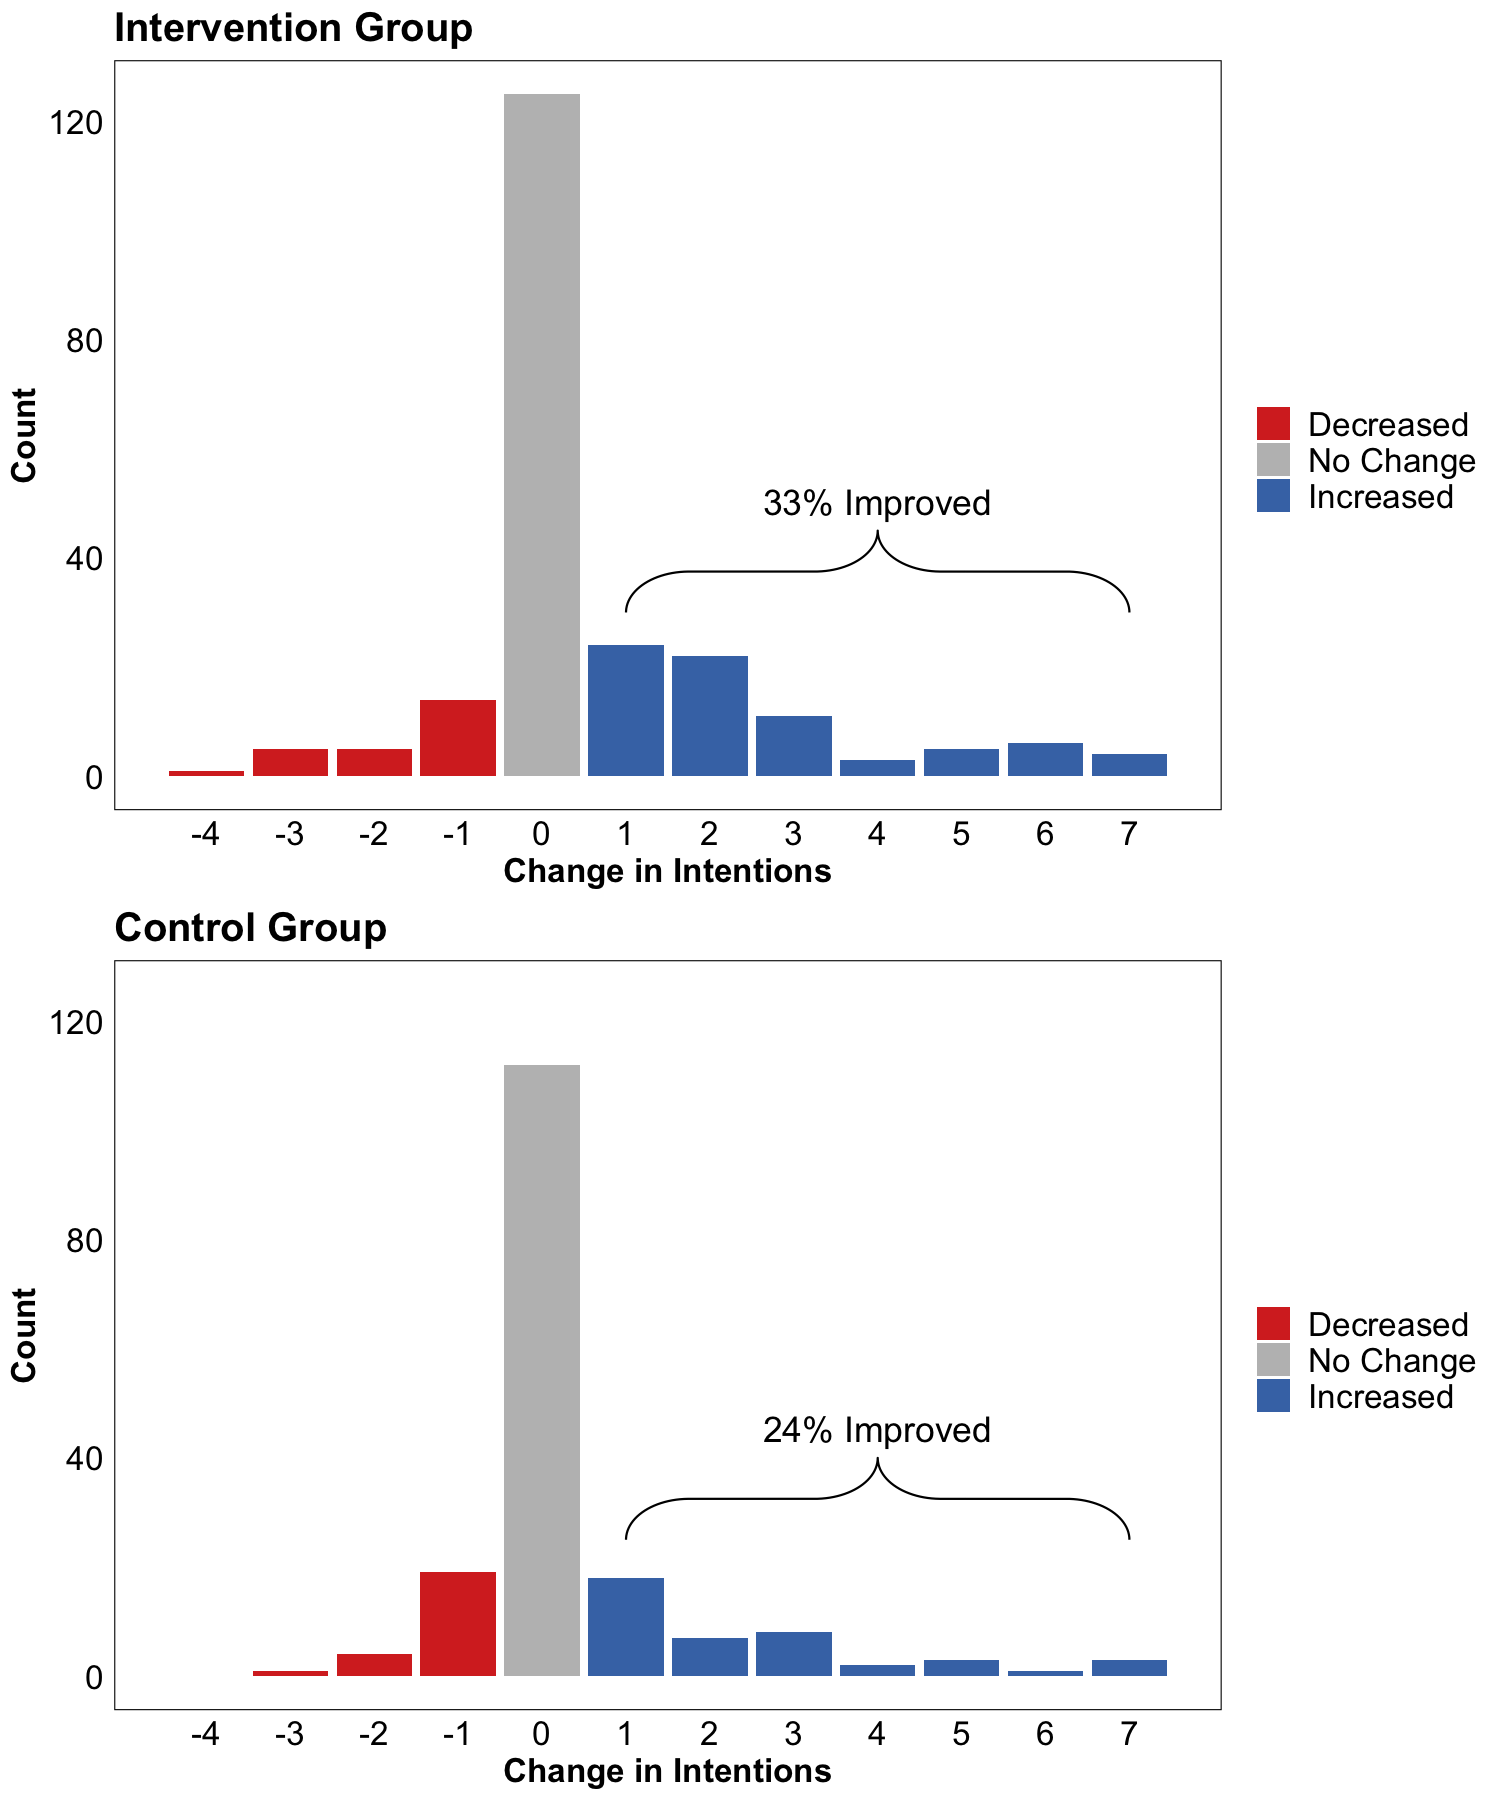

In [3]:
library(ggbrace)
vcf_data$intent_change <- as.numeric(vcf_data$intention_6) - as.numeric(vcf_data$base_intention)

# Plot the change scores for the treatment group members
plot_df <- vcf_data %>% filter(group == "Treatment") %>% 
    filter(!is.na(intent_change)) %>%
    group_by(intent_change) %>% count()

decrease_n <- (vcf_data$intent_change < 0 & vcf_data$group == "Treatment") %>% sum(na.rm = TRUE)
no_change_n <- (vcf_data$intent_change == 0 & vcf_data$group == "Treatment") %>% sum(na.rm = TRUE)
increase_n <- (vcf_data$intent_change > 0 & vcf_data$group == "Treatment") %>% sum(na.rm = TRUE)

decrease_p <- 100*round(decrease_n/sum(!is.na(vcf_data$intention_6) & vcf_data$group == "Treatment"), 2)
no_change_p <- 100*round(no_change_n/sum(!is.na(vcf_data$intention_6) & vcf_data$group == "Treatment"), 2)
increase_p <- 100*round(increase_n/sum(!is.na(vcf_data$intention_6) & vcf_data$group == "Treatment"), 2)

decrease_label <- paste0("Decreased (N = ", decrease_n, ", ", decrease_p, "%)")
no_change_label <- paste0("No Change (N = ", no_change_n, ", ", no_change_p, "%)")
increase_label <- paste0("Increased (N = ", increase_n, ", ", increase_p, "%)")
decrease_label <- "Decreased"
no_change_label <- "No Change"
increase_label <- "Increased"

plot_df$color <- NA
plot_df$color[plot_df$intent_change < 0] <- decrease_label
plot_df$color[plot_df$intent_change == 0] <- no_change_label
plot_df$color[plot_df$intent_change > 0] <- increase_label

plot_df$color <- factor(plot_df$color,
                        levels = c(decrease_label, no_change_label, increase_label))

p1 <- ggplot(data = plot_df,
       mapping = aes(x = intent_change,
                     y = n, 
                     fill = color)) +
    geom_col() + 
    theme_minimal() + 
    scale_fill_manual(values = c("#d73027", "gray", "#4575b4")) +
    #theme(legend.position = c(0.75, 0.8)) +
    theme( 
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),    
        axis.text.y = element_text(size = 16)) + 
    theme(panel.border = element_rect(color = "black", fill = NA, linewidth = 0.5),
          axis.title.x = element_text(size = 16, color = "black"),
          axis.text.x = element_text(size = 16, color= "black"),
          axis.text.y = element_text(size = 16, color = "black"),
          axis.title.y = element_text(size = 16, color = "black"),
          legend.text = element_text(size = 16, color = "black"),
          title = element_text(size = 16, face = "bold", colour = "black")) + 
    scale_x_continuous(limits = c(-4.5,7.5), breaks = -4:7) +
    labs(x = "Change in Intentions",
         y = "Count",
         title = "Intervention Group",
         fill = "")  +
    ylim(0,125) +
    geom_brace(aes(x = c(1, 7), y = c(30, 45), label = "33% Improved"), inherit.data = F, labelsize = 6)
                  

# Plot the change scores for the control group members
plot_df <- vcf_data %>% filter(group == "Control") %>% 
    filter(!is.na(intent_change)) %>%
    group_by(intent_change) %>% count()

decrease_n <- (vcf_data$intent_change < 0 & vcf_data$group == "Control") %>% sum(na.rm = TRUE)
no_change_n <- (vcf_data$intent_change == 0 & vcf_data$group == "Control") %>% sum(na.rm = TRUE)
increase_n <- (vcf_data$intent_change > 0 & vcf_data$group == "Control") %>% sum(na.rm = TRUE)

decrease_p <- 100*round(decrease_n/sum(!is.na(vcf_data$intention_6) & vcf_data$group == "Control"), 2)
no_change_p <- 100*round(no_change_n/sum(!is.na(vcf_data$intention_6) & vcf_data$group == "Control"), 2)
increase_p <- 100*round(increase_n/sum(!is.na(vcf_data$intention_6) & vcf_data$group == "Control"), 2)

decrease_label <- paste0("Decreased (N = ", decrease_n, ", ", decrease_p, "%)")
no_change_label <- paste0("No Change (N = ", no_change_n, ", ", no_change_p, "%)")
increase_label <- paste0("Increased (N = ", increase_n, ", ", increase_p, "%)")
decrease_label <- "Decreased"
no_change_label <- "No Change"
increase_label <- "Increased"

plot_df$color <- NA
plot_df$color[plot_df$intent_change < 0] <- decrease_label
plot_df$color[plot_df$intent_change == 0] <- no_change_label
plot_df$color[plot_df$intent_change > 0] <- increase_label

plot_df$color <- factor(plot_df$color,
                        levels = c(decrease_label, no_change_label, increase_label))

p2 <- ggplot(data = plot_df,
       mapping = aes(x = intent_change,
                     y = n, 
                     fill = color)) +
    geom_col() + 
    theme_minimal() + 
    scale_fill_manual(values = c("#d73027", "gray", "#4575b4")) +
    #theme(legend.position = c(0.75, 0.8)) +
    theme( 
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),    
        axis.text.y = element_text(size = 16)) + 
    theme(panel.border = element_rect(color = "black", fill = NA, linewidth = 0.5),
          axis.title.x = element_text(size = 16, color = "black"),
          axis.text.x = element_text(size = 16, color= "black"),
          axis.text.y = element_text(size = 16, color = "black"),
          axis.title.y = element_text(size = 16, color = "black"),
          legend.text = element_text(size = 16, color = "black"),
          title = element_text(size = 16, face = "bold", colour = "black")) + 
    scale_x_continuous(limits = c(-4.5,7.5), breaks = -4:7) +
    labs(x = "Change in Intentions",
         y = "Count",
         title = "Control Group",
         fill = "") +
    ylim(0,125) +
    geom_brace(aes(x = c(1, 7), y = c(25, 40), label = "24% Improved"), inherit.data = F, labelsize = 6)

options(repr.plot.width = 10, repr.plot.height = 12, repr.plot.res = 150)
grid.arrange(p1, p2, ncol=1)

## Improved intentions

In [4]:
vcf_data$improved_intent <- NA
vcf_data$improved_intent[vcf_data$intent_change > 0] <- TRUE
vcf_data$improved_intent[vcf_data$intent_change <= 0] <- FALSE

trt_improve_count <- sum(vcf_data$improved_intent == TRUE & 
                       vcf_data$group == "Treatment", na.rm = TRUE)
trt_not_improve_count <- sum(vcf_data$improved_intent == FALSE & 
                       vcf_data$group == "Treatment", na.rm = TRUE)
ctrl_improve_count <- sum(vcf_data$improved_intent == TRUE & 
                       vcf_data$group == "Control", na.rm = TRUE)
ctrl_not_improve_count <- sum(vcf_data$improved_intent == FALSE & 
                       vcf_data$group == "Control", na.rm = TRUE) #+ 1
M <- matrix(c(ctrl_not_improve_count, ctrl_improve_count, 
              trt_not_improve_count, trt_improve_count),byrow=TRUE,nrow=2)
dimnames(M) <- list(`Exposed to Treatment` = c("No", "Yes"),
                     Improved = c("No", "Yes"))
rr <- epitab(M,method="riskratio", riskratio = "wald", pvalue = "chi2")$tab
print(rr)
RR <- round(rr[2,5], 3)
RR_low <- round(rr[2,6], 3)
RR_high <- round(rr[2,7], 3)
p <- round(rr[2,8], 4)
paste0(RR, " (", RR_low, " to ", RR_high, "; P = ", p, ")")

                    Improved
Exposed to Treatment  No        p0 Yes        p1 riskratio    lower    upper
                 No  136 0.7640449  42 0.2359551  1.000000       NA       NA
                 Yes 150 0.6666667  75 0.3333333  1.412698 1.023233 1.950403
                    Improved
Exposed to Treatment    p.value
                 No          NA
                 Yes 0.03246394


[1] "1.413 (1.023 to 1.95; P = 0.0325)"

## Vaccine uptake

In [5]:
trt_vax_count <- sum(vcf_data$vax_y_n_6 == "Yes" & 
                       vcf_data$group == "Treatment", na.rm = TRUE)
trt_unvax_count <- sum(vcf_data$group == "Treatment") - trt_vax_count
ctrl_vax_count <- sum(vcf_data$vax_y_n_6 == "Yes" & vcf_data$group == "Control", na.rm = TRUE)
ctrl_unvax_count <- sum(vcf_data$group == "Control") - ctrl_vax_count
M <- matrix(c(ctrl_unvax_count, ctrl_vax_count, 
              trt_unvax_count, trt_vax_count),byrow=TRUE,nrow=2)
dimnames(M) <- list(`Exposed to Treatment` = c("No", "Yes"),
                     Vaccinated = c("No", "Yes"))
rr <- epitab(M,method="riskratio", riskratio = "wald", pvalue = "chi2")$tab
print(rr)
RR <- round(rr[2,5], 3)
RR_low <- round(rr[2,6], 3)
RR_high <- round(rr[2,7], 3)
p <- round(rr[2,8], 4)
paste0(RR, " (", RR_low, " to ", RR_high, "; p = ", p, ")")

                    Vaccinated
Exposed to Treatment  No        p0 Yes         p1 riskratio     lower    upper
                 No  205 0.9534884  10 0.04651163  1.000000        NA       NA
                 Yes 244 0.9277567  19 0.07224335  1.553232 0.7379523 3.269221
                    Vaccinated
Exposed to Treatment   p.value
                 No         NA
                 Yes 0.2410562


[1] "1.553 (0.738 to 3.269; p = 0.2411)"

In [ ]:
#vcf_data$intention_6[vcf_data$participant_id == "p_276"] <- "Not at all likely"
#vcf_data$vax_y_n_6[vcf_data$participant_id == "p_276"] <- "No"